# Исследование успешности компьютерных игр <a id='intro'></a>
### Введение
_____
**Описание исследования.**  

В исследовании проводится анализ данных о продажах компьютерных игр за период до 2017 года в разбивке по регионам 
_____
**Цель исследования.**
    
Выявить закономерности успешности игр и корреляции между различными параметрами для оптимизации рекламной кампании грядущего сезона 
    
_____
**Задачи исследования.**

1. [Ознакомиться с данными и изучить общую информацию](#step1)
2. [Подготовить данные](#step2)
3. [Провести исследовательский анализ](#step3)
4. [Составить портрет пользователя по регионам](#step4)
5. [Проверить гипотезы](#step5)
6. [Составить общий вывод](#step6)
_____
**Исходные данные.**
    
Таблица 'games.csv' состоит из следующих столбцов:  
1. Name — название игры
1. Platform — платформа
1. Year_of_Release — год выпуска
1. Genre — жанр игры
1. NA_sales — продажи в Северной Америке (миллионы проданных копий)
1. EU_sales — продажи в Европе (миллионы проданных копий)
1. JP_sales — продажи в Японии (миллионы проданных копий)
1. Other_sales — продажи в других странах (миллионы проданных копий)
1. Critic_Score — оценка критиков (максимум 100)
1. User_Score — оценка пользователей (максимум 10)
1. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

### Шаг 1: Знакомство с данными, изучение общей информации 
<a id='step1'></a>

In [205]:
#подгрузка необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [206]:
#загрузка таблицы, вывод основной информации
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


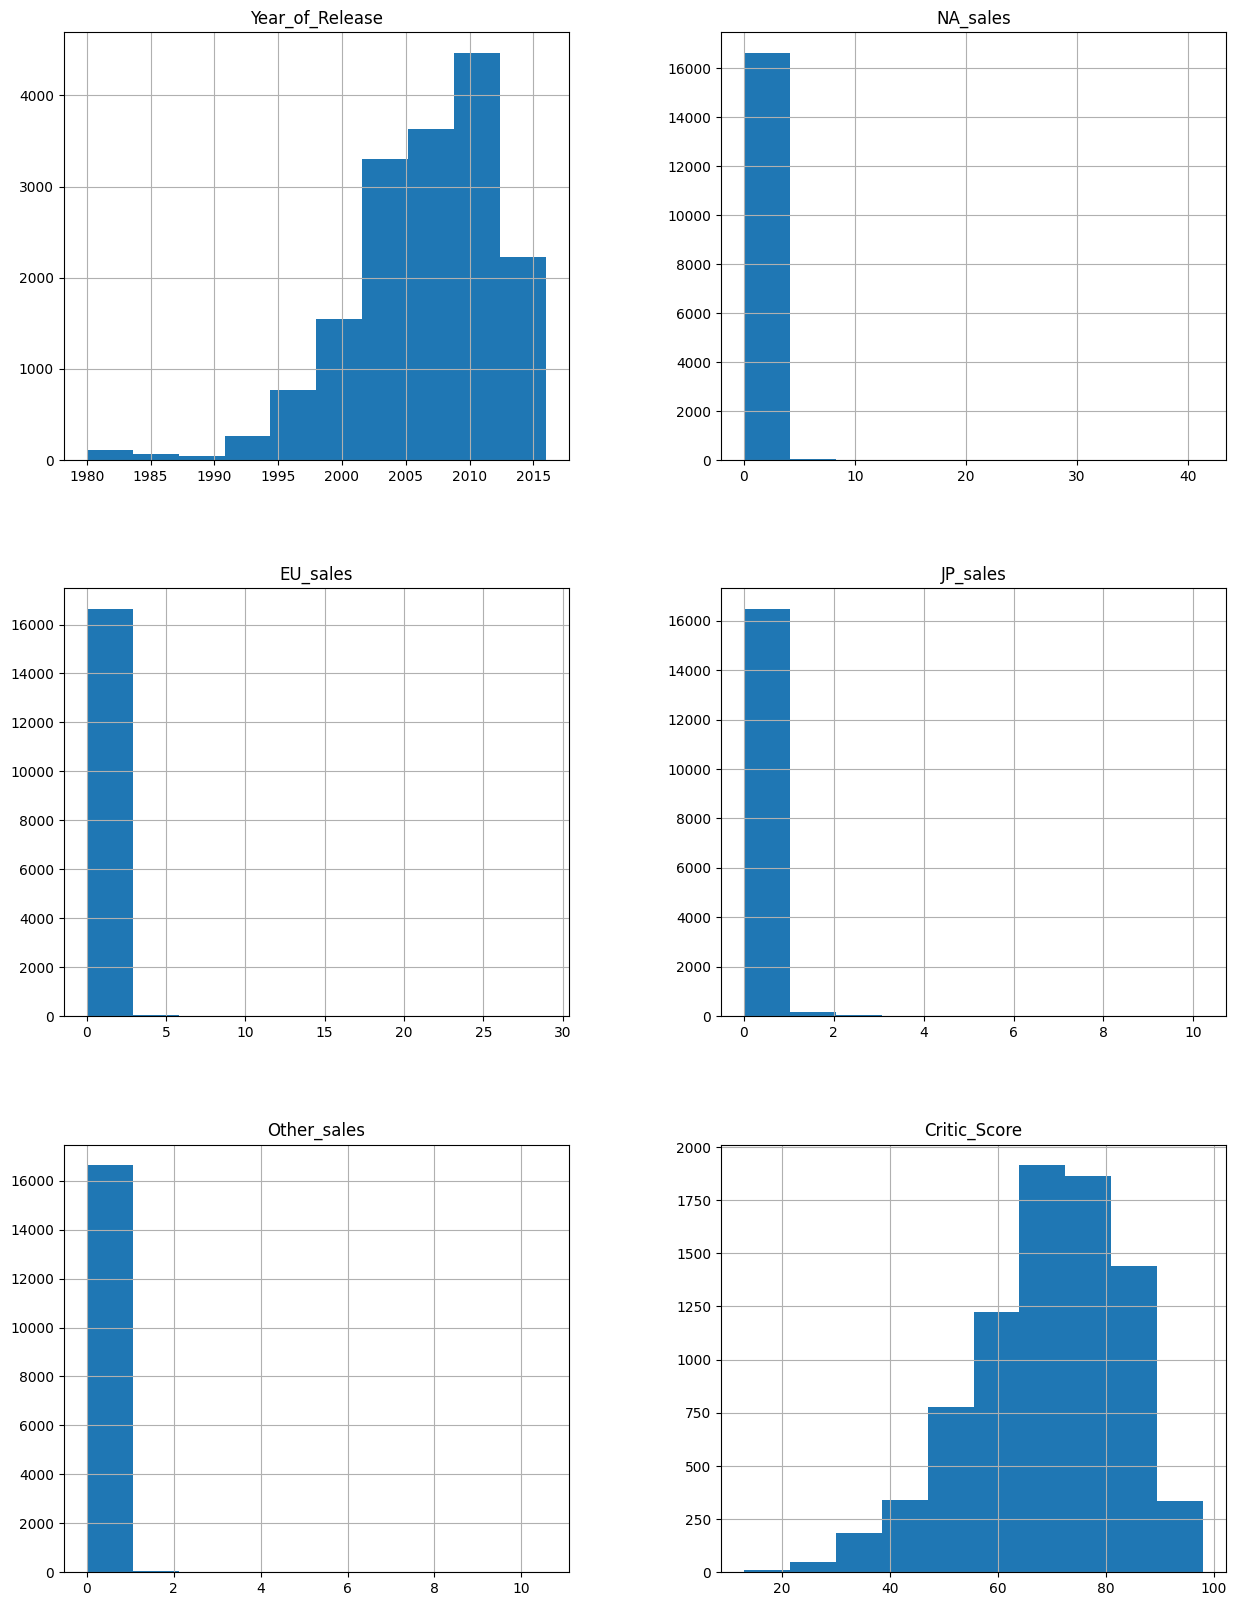

In [207]:
#построение гистограмм, знакомство с первыми строками таблицы
data.hist(figsize=(15, 20))
data.head()

### Промежуточный вывод:
Данные получены. Видны пропуски и неправильные типы данных в нескольких столбцах. Судя по диаграммам, имеются выбросы в продажах - какие-то игры были на порядок популярнее большинства. Также заметен рост количества игр выпущенных за год.

### Шаг 2: Подготовка данных <a id='step2'></a>

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Начнём с приведения названий столбцов к каноническому виду. К счастью, в нашем случае достаточно привести их к нижнему регистру:

In [209]:
#data.rename(str.lower, axis='columns', inplace=True)

In [210]:
#переделал. да, так проще
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь разберёмся с типом данных.  
1. year_of_release - к int, год не бывает дробным
2. user_score - к float, это численная оценка. Мы не сможем строить распределение по строкам.


In [211]:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')

**Поиск явных и неявных дубликатов** <a id='duplicates'></a>

In [212]:
data.shape

(16715, 11)

In [213]:
data = data.drop_duplicates()

In [214]:
data.shape

(16715, 11)

полного совпадения строк не обнаружено.

In [215]:
data.groupby(['name', 'platform']).agg({'other_sales': 'count'}).query('other_sales>1')

other_sales
name                        platform             
Madden NFL 13               PS3                 2
Need for Speed: Most Wanted PC                  2
                            X360                2
Sonic the Hedgehog          PS3                 2

Разберёмся с каждым из дубликатов в отдельности

In [216]:
data.query('name =="Madden NFL 13"').query('platform=="PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


0.01 продаж в Европе странным образом оказался в отдельной строке. Должно быть багом, добавим это количество к основной строке и удалим последнюю [тут](#deldup)

In [217]:
data.query('name =="Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Это игры разных годов выпуска (ремастер?). Это всё же разные игры, с ними ничего не будем делать. Это не дубликат.

In [218]:
data.query('name =="Sonic the Hedgehog"').query('platform=="PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,<NA>,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


Судя по всему, ситуация та же, что в первом случае - часть покупок из Европы зачлась отдельно.

In [219]:
data.loc[(data['name']=='Madden NFL 13') & (data['platform']=='PS3'), 'eu_sales'] += 0.01
data.loc[(data['name']=='Sonic the Hedgehog') & (data['platform']=='PS3'), 'eu_sales'] += 0.48
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

**Разберемся с оставшимися пропусками**

In [220]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score есть значение 'tbd', что означает to be determined == будет определено. С практической точки зрения, для нас это такой же nan.

In [221]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           9948 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Теперь обработаем пропуски. В столбцах name, genre и year_of_release пропусков менее 5%, их можно просто удалить из датафрейма.  
В полях critic_score, user_score и rating, напротив, пропусков очень много. Удалить их нельзя, и чем их заполнить - неочевидно. Оставим как есть, но в rating поставим заглушку - переименуем non в 'undefined' чтобы видеть данные по этой категории отдельно. Лишним не будет.

In [222]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data['rating'].fillna('undefined', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Касательно **причин** пропусков, имя, жанр и год релиза - скорее всего, человеческий фактор. Просто забыли внести в базу данных. Оценки критиков и оценки пользователей - возможно, игры недостаточно популярны, и оценок просто нет. Это надо отдельно исследовать по объемам продаж. То же касается и рейтинга - возможно, он не был заказан.

Осталось посчитать **суммарные продажи** во всех регионах и записать их в отдельный столбец:

In [223]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


### Промежуточный вывод:
Данные подготовлены без особых потерь. Природа пропусков остается ясной не до конца. Возможно, стоит спросить у девелоперов.

### Шаг 3: Исследовательский анализ. <a id='step3'></a>

Посмотрим, сколько игр выпускалось в разные годы:

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


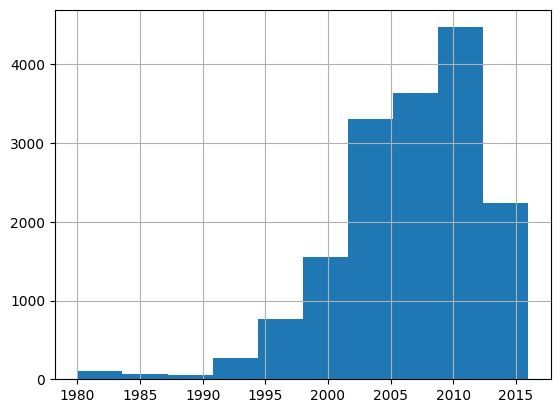

In [224]:
data['year_of_release'].hist()
data.groupby('year_of_release').agg({'name':'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


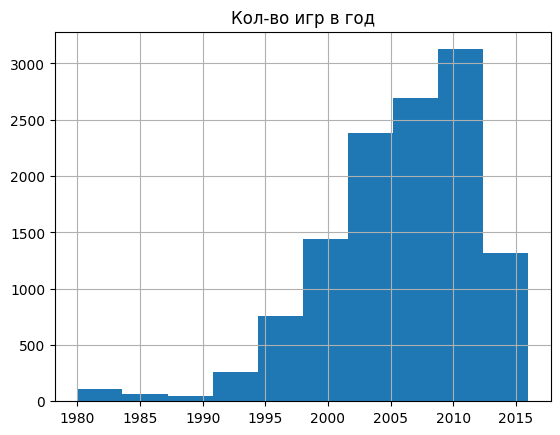

In [225]:
data.drop_duplicates(subset=['name', 'year_of_release'])['year_of_release'].hist()
plt.title('Кол-во игр в год')
data.drop_duplicates(subset=['name', 'year_of_release']).groupby('year_of_release').agg({'name':'count'})

Заметны резкий скачок вверх в 2002 и резкое падение в 2012.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

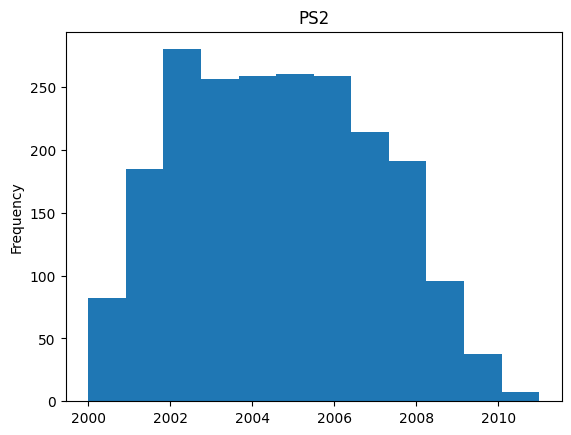

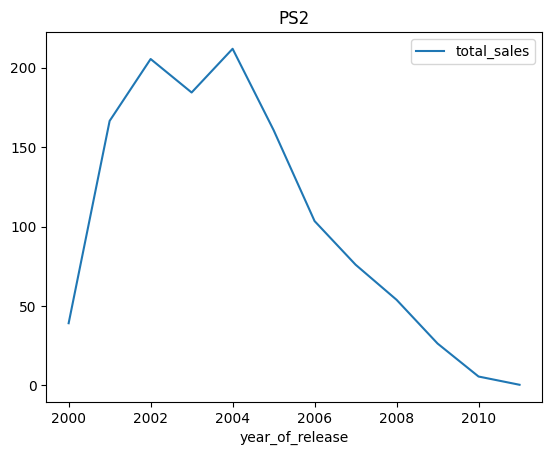

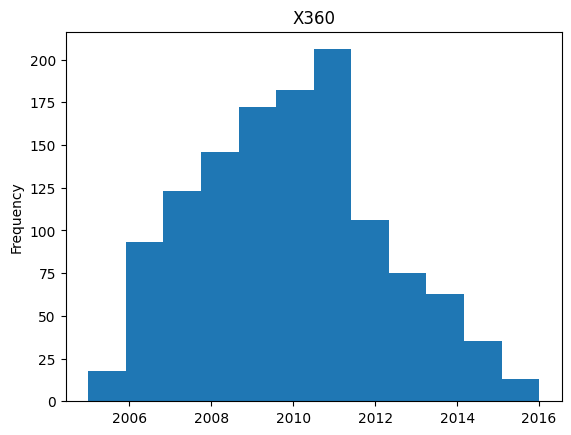

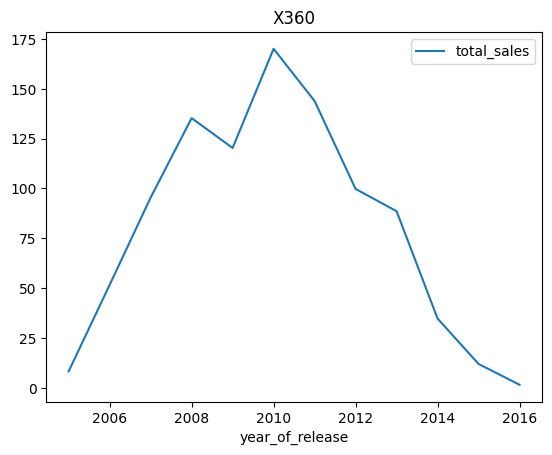

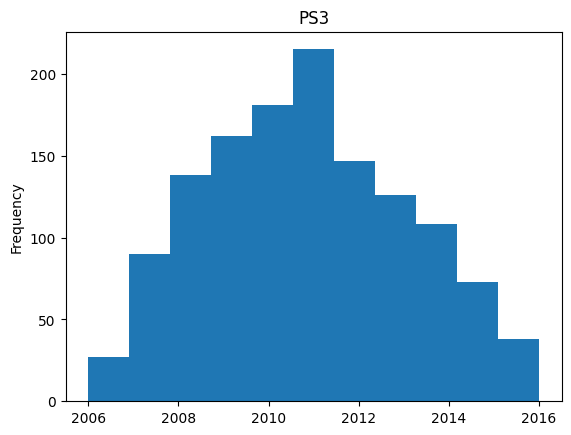

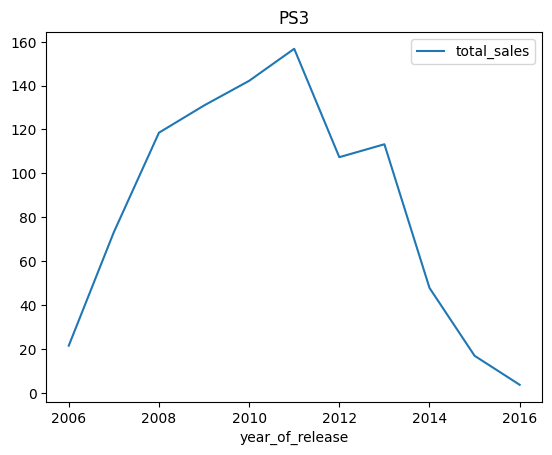

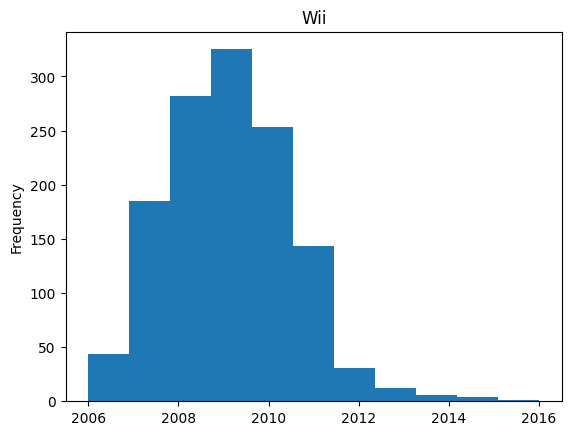

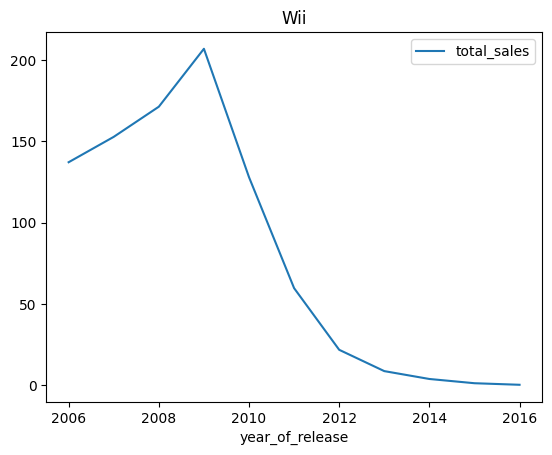

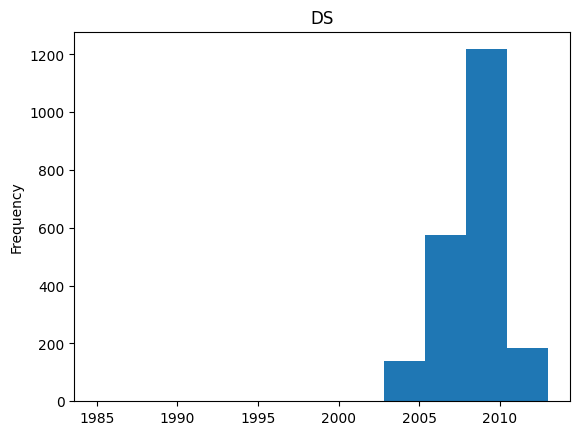

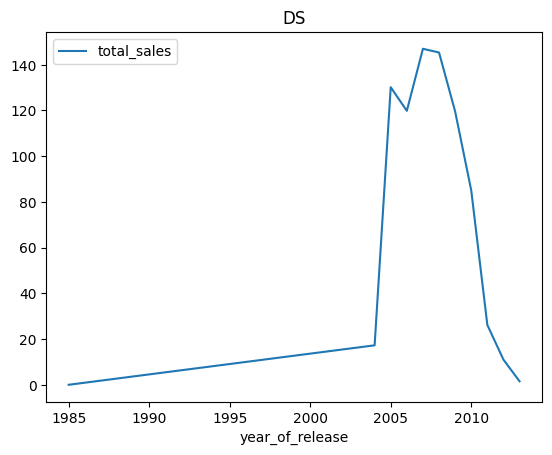

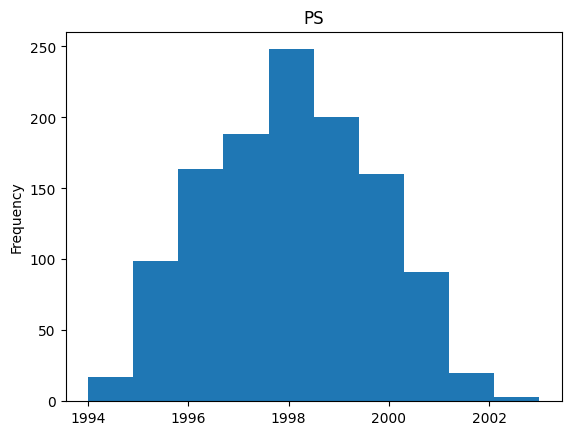

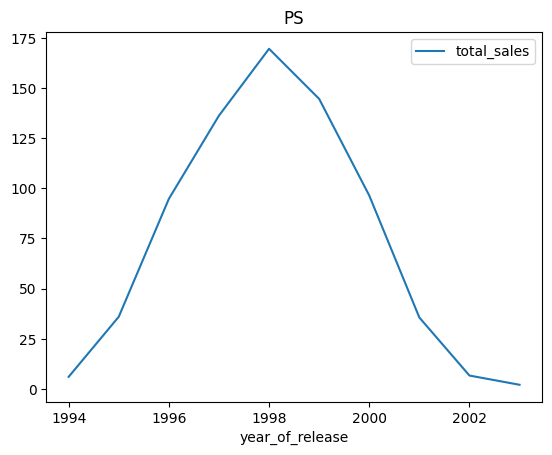

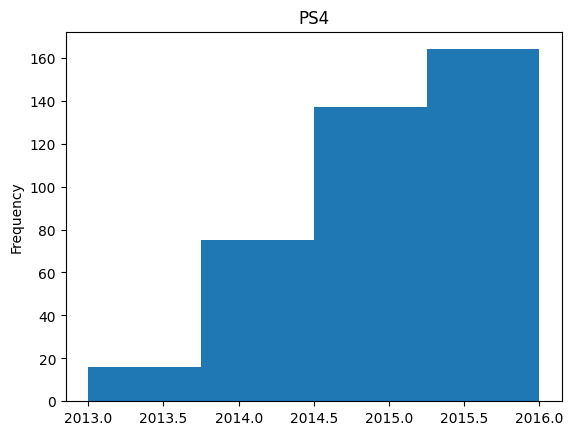

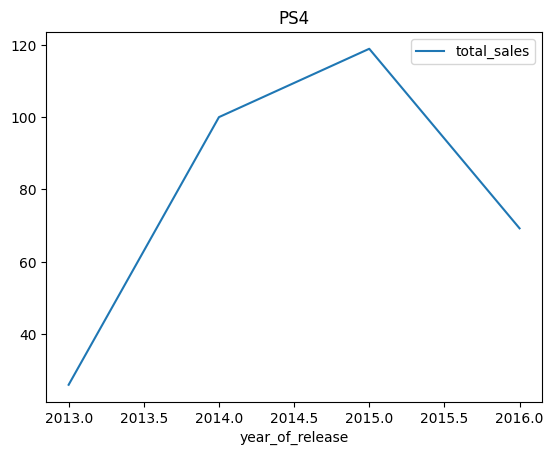

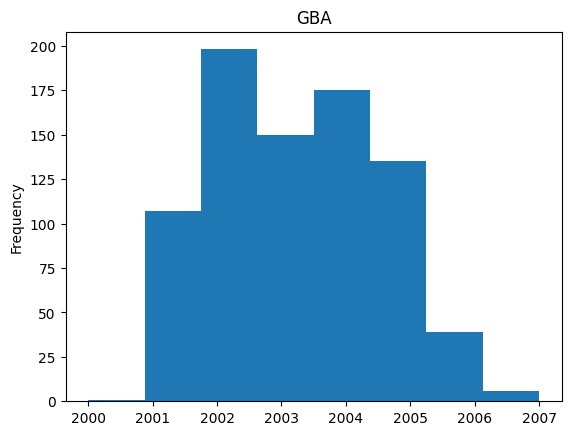

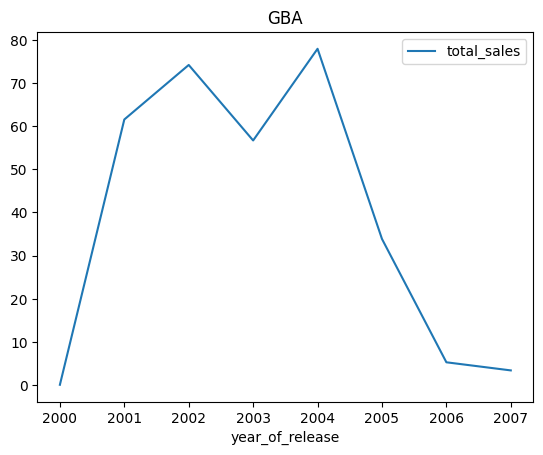

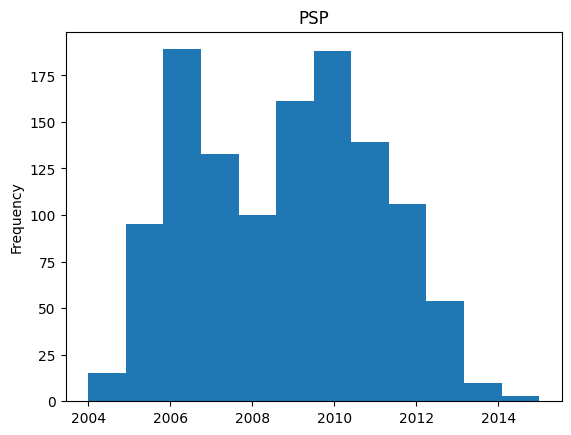

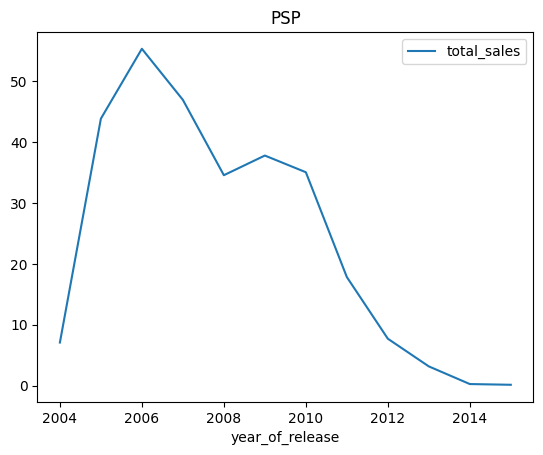

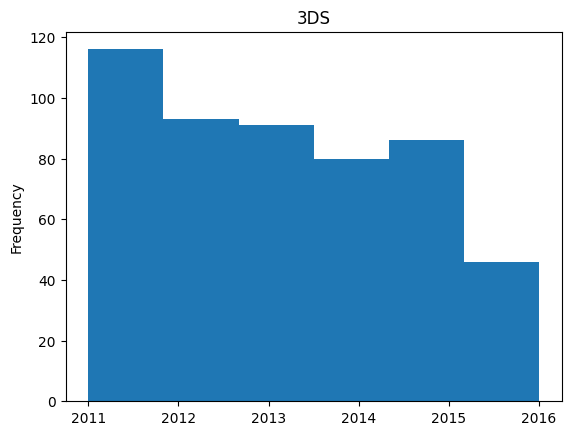

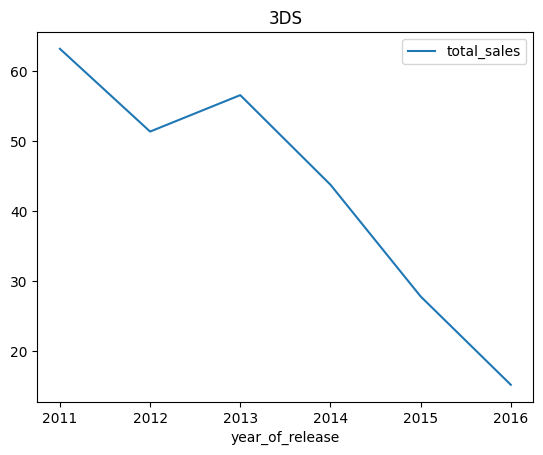

In [226]:
for platform in data.groupby(['platform']).agg({'total_sales': 'sum'}) \
        .sort_values(by='total_sales', ascending=False).head(10).index:
    data[data['platform']==platform]['year_of_release']  \
            .plot(kind='hist', title=platform, bins=len(data[data['platform']==platform]['year_of_release'].unique()))
    data[data['platform']==platform].groupby('year_of_release').agg({'total_sales':'sum'}).plot(title=platform)
    plt.show()

In [227]:
data.query('platform=="DS" and year_of_release<2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,undefined,0.02


In [228]:
data = data.query('not (platform=="DS" and year_of_release<2000)')

Построим для каждой из платформ по две диаграммы: с количеством игр и с общим числом продаж.  
Пройдёмся по каждой из платформ:  
1. PS2: C 2004 интерес пользователей начал стремительно угасать. С 2007 платформа стала сокращать число игр. Срок жизни - 10 лет.
2. Х360: Рост продаж соразмерен количеству новых игр каждый год. Интересен резкий спад в 2011. Срок жизни - 10 лет.
3. PS3: Рост продаж соразмерен количеству новых игр каждый год. Интересен резкий спад в 2011. Срок жизни - 10 лет.
4. Wii: Рост продаж соразмерен количеству новых игр каждый год. Интересен резкий спад в 2011. Срок жизни - 10 лет, но после 2012(6 лет) игр очень мало.
5. DS: Одна из самых древних платформ. До 2003 игр очень мало, и это, видимо, совсем другая эра. Существенный период - 2003-2013 - всё те же 10 лет.
6. PS: Рост продаж соразмерен количеству новых игр каждый год. Игры 90-х. Срок жизни - 10 лет. Видимо, потом было PS2, а далее - PS3, поэтому, быть может, их вообще стоит рассматривать как единую платформу
7. PS4: Рост продаж соразмерен количеству новых игр каждый год. Срок жизни - 3 года (до 2016 то есть до конца сбора данных, может она жила и дальше).
8. GBA: Рост продаж соразмерен количеству новых игр каждый год. Срок жизни - 7 лет.
9. PSP: Интересны 2 пика - 2006 и 2010 года. В остальном всё также. Срок жизни - 10 лет.
10. 3DS: Рост продаж соразмерен количеству новых игр каждый год. Срок жизни - 5 лет.  

Резюмируя, прослеживается корреляция межды количеством игр и количеством продаж. Типичная схема жизни - один горб - сначала рост, а потом сворачивание производства. Медианный срок жизни платформы - 10 лет.



Если срок жизни платформы - 10 лет, и последние года - тихая бесславная смерть, нам не понадобятся данные старше 7 лет. Таким образом, отрежем всё, что старше 2010 года и не имело релизов в последние 3 года.


In [229]:
data = data[(data['year_of_release']>=2014)]

In [230]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Таким образом, у нас осталось всего 10 актуальных платформ.
Посмотрим на них тем же способом, что до того смотрели на наиболее популярные во всём датафрейме

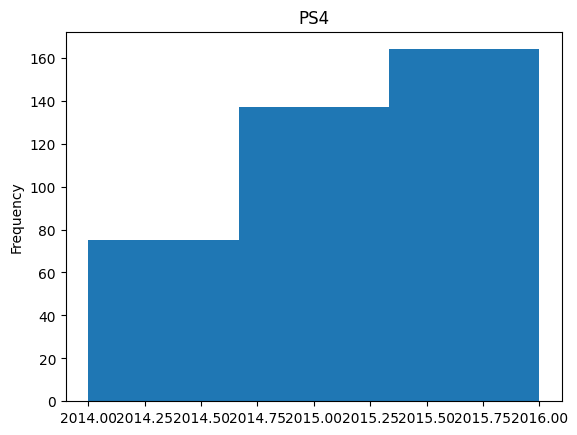

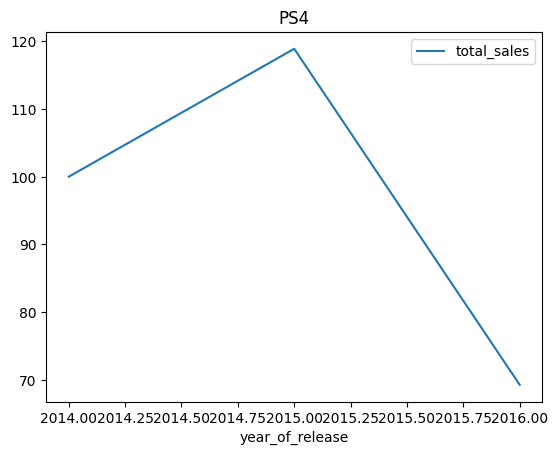

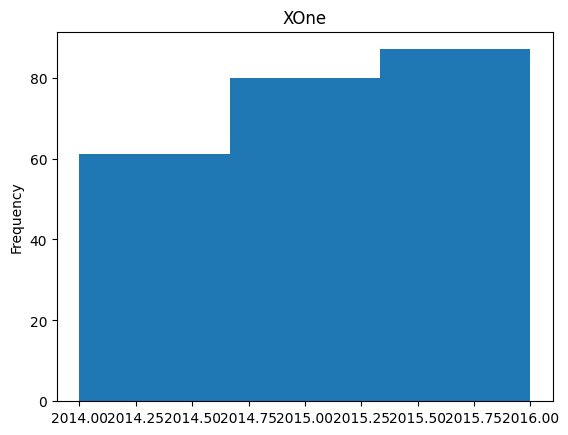

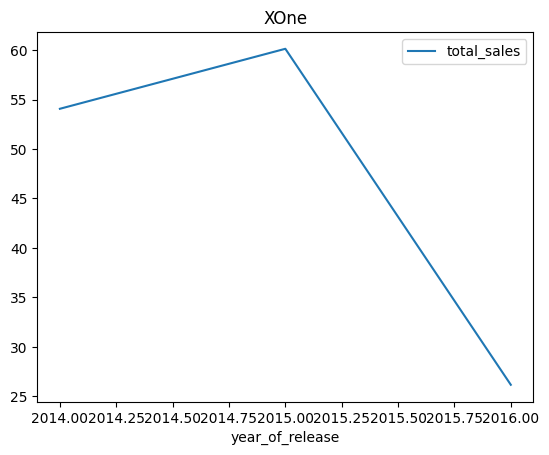

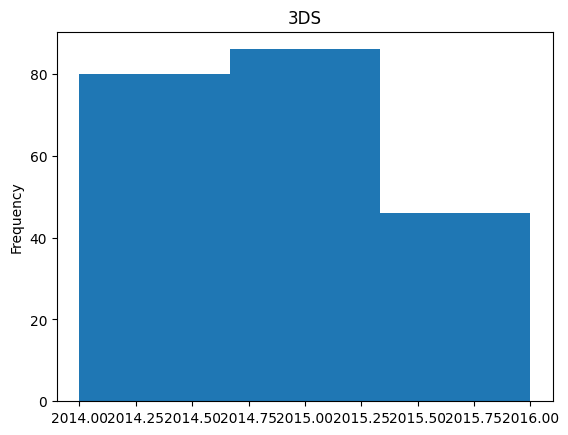

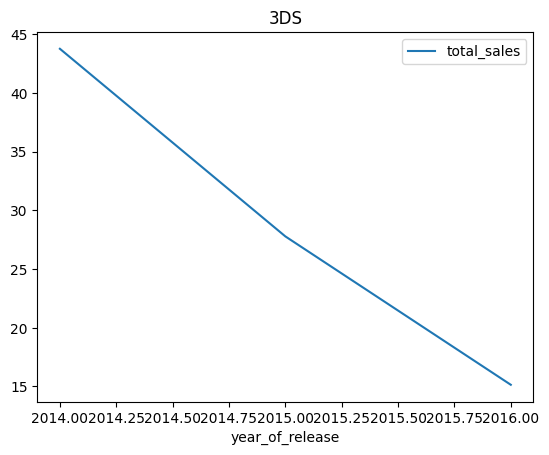

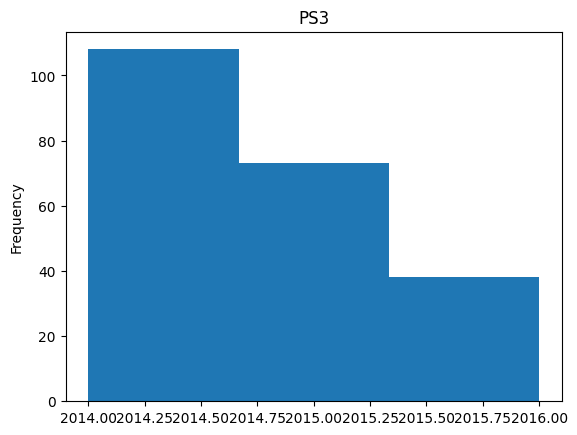

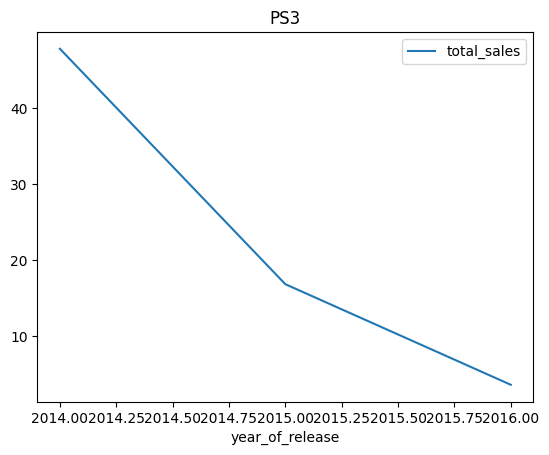

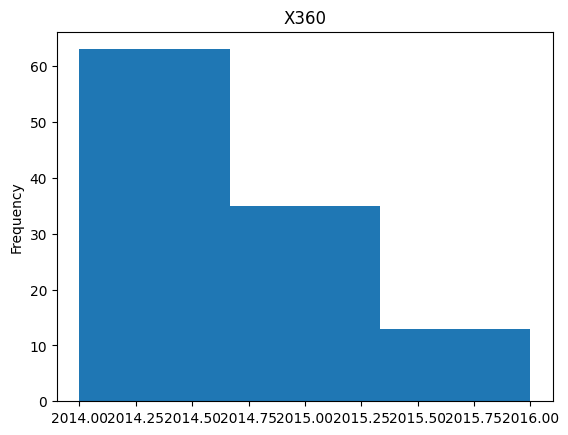

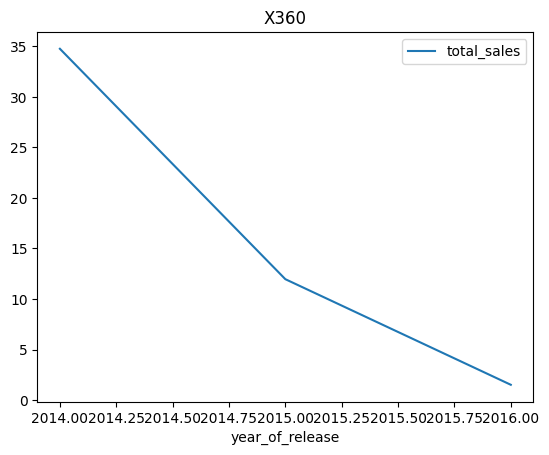

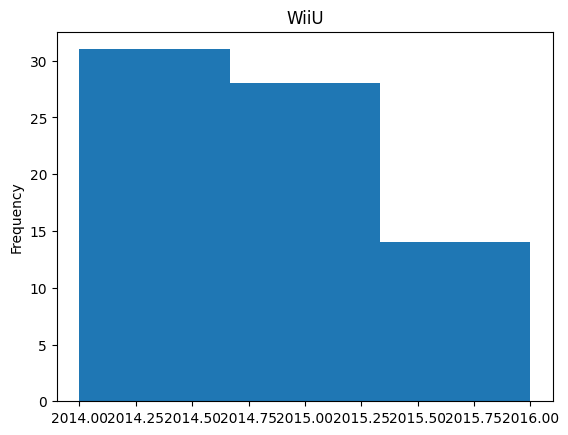

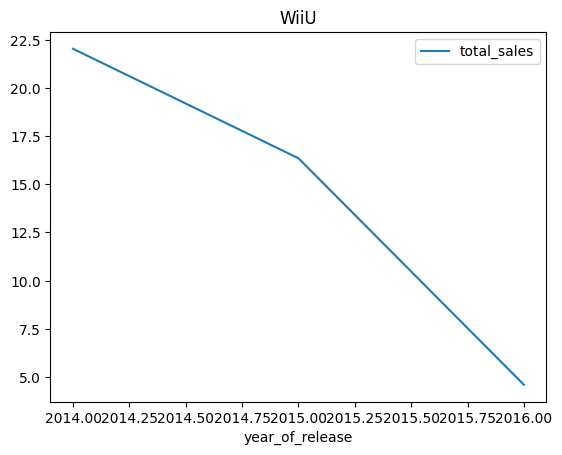

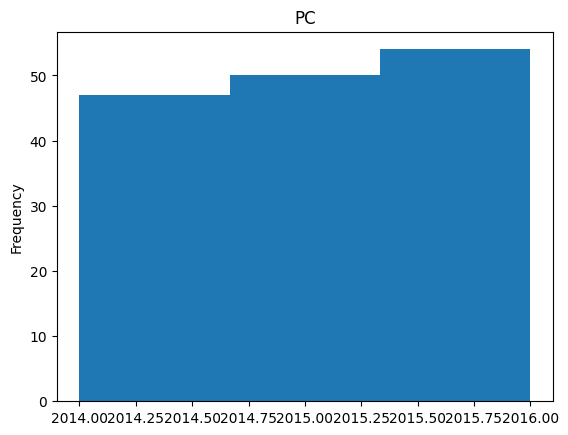

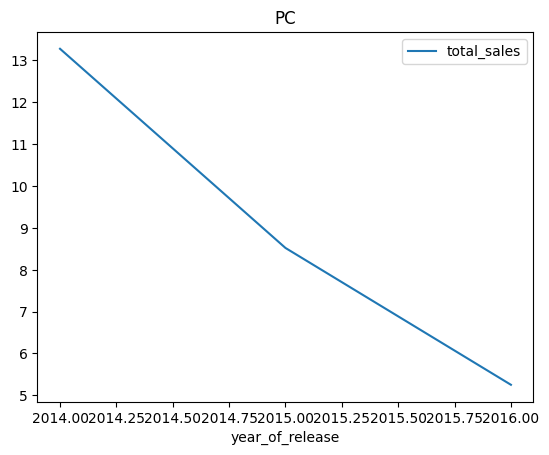

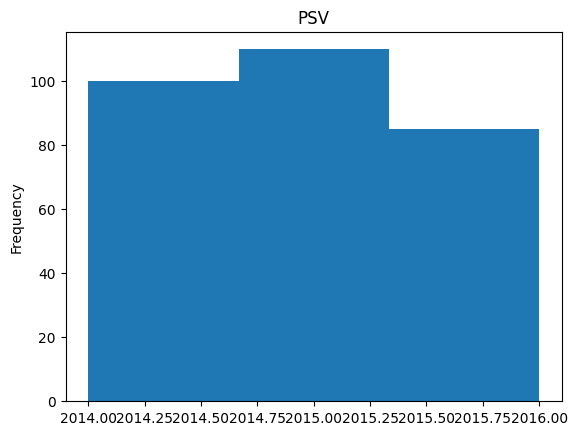

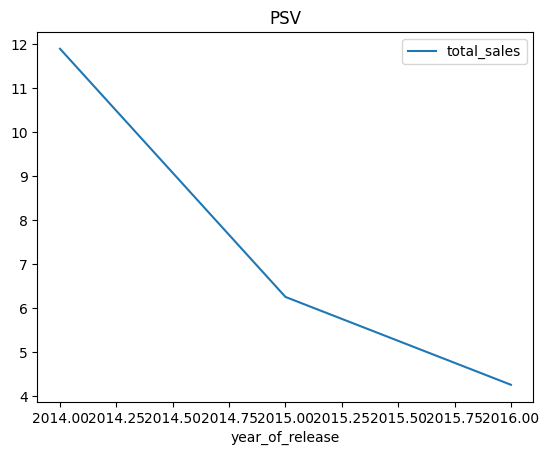

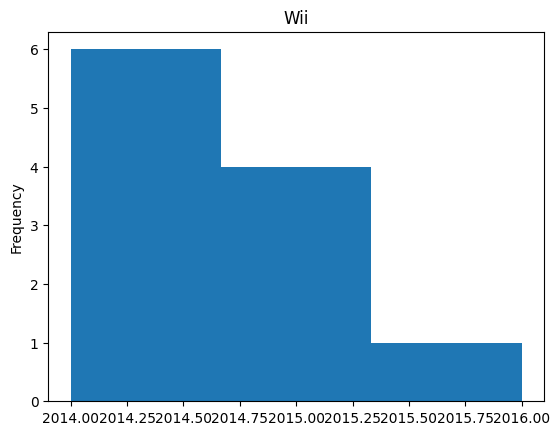

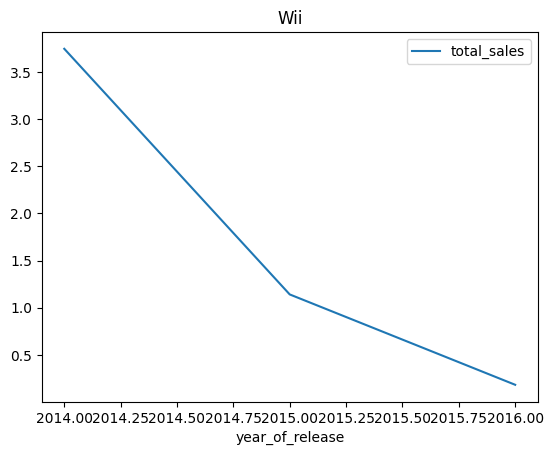

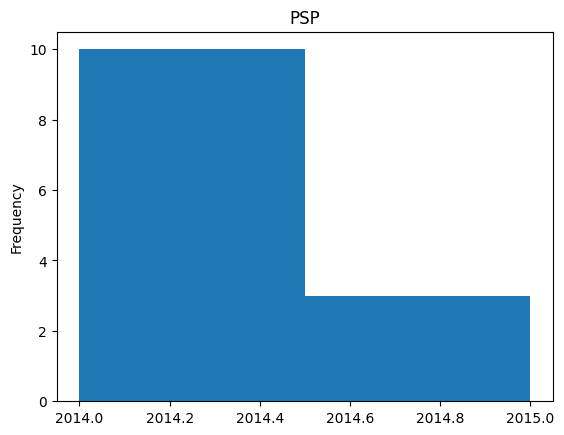

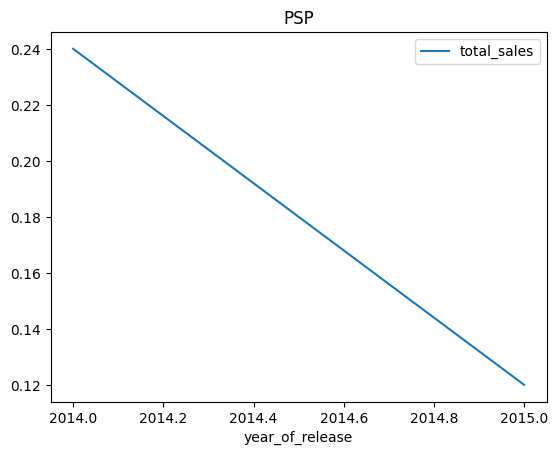

In [231]:
for platform in data.groupby(['platform']).agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).index:
    data[data['platform']==platform]['year_of_release'].plot(kind='hist', title=platform, \
                                                    bins=len(data[data['platform']==platform]['year_of_release'].unique()))
    data[data['platform']==platform].groupby('year_of_release').agg({'total_sales':'sum'}).plot(title=platform)
    plt.show()

Видно, что перспективы есть у платформ PS4, XOne, PSV. Также стоит оставить PC - он выдаёт стабильные результаты долгие годы.  

Отсечём лишнее:

In [232]:
data = data[(data['platform'] == 'PS4') | (data['platform'] ==  'XOne') | (data['platform'] ==  'PSV') | (data['platform'] ==  'PC')]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1050 non-null   object 
 1   platform         1050 non-null   object 
 2   year_of_release  1050 non-null   Int64  
 3   genre            1050 non-null   object 
 4   na_sales         1050 non-null   float64
 5   eu_sales         1050 non-null   float64
 6   jp_sales         1050 non-null   float64
 7   other_sales      1050 non-null   float64
 8   critic_score     562 non-null    float64
 9   user_score       602 non-null    float64
 10  rating           1050 non-null   object 
 11  total_sales      1050 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 107.7+ KB


**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:** <a id='boxplot'></a>

<Axes: title={'center': 'total_sales'}, xlabel='platform'>

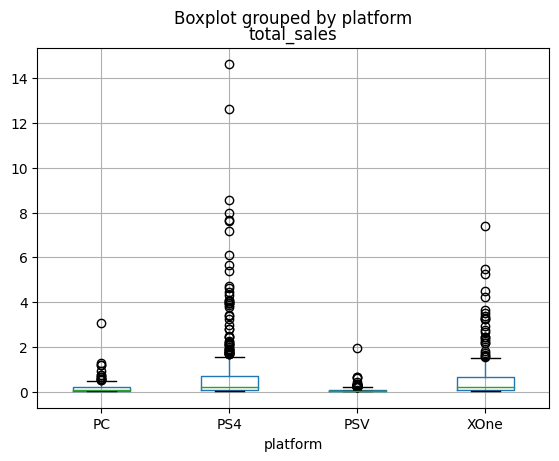

In [233]:
data.boxplot(by='platform', column='total_sales')

(0.0, 1.6)

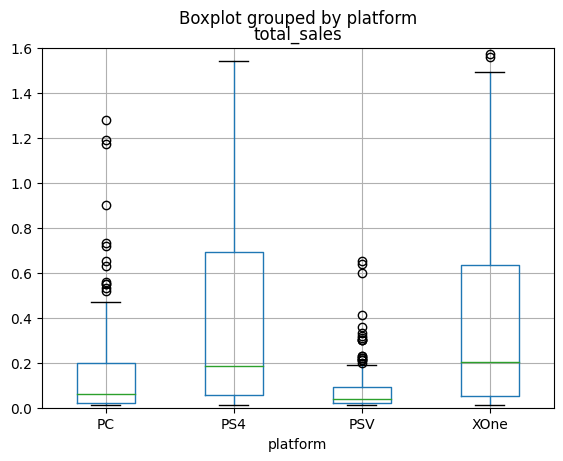

In [234]:
data.boxplot(by='platform', column='total_sales')
plt.ylim(0, 1.6)

Для всех четырёх платформ характерно наличие выбросов (топовых игр), превышающих средний уровень продаж на порядок. Более перспективными и по границам усов, и по выбросам, кажутся PS4 и XOne.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

0.40266141068104083
-0.040131589472697356
0.42867694370333226
-0.0703839280647581
0.17463413769350036
-0.07159665703472452
0.04266490657009526
-0.16845504978064446


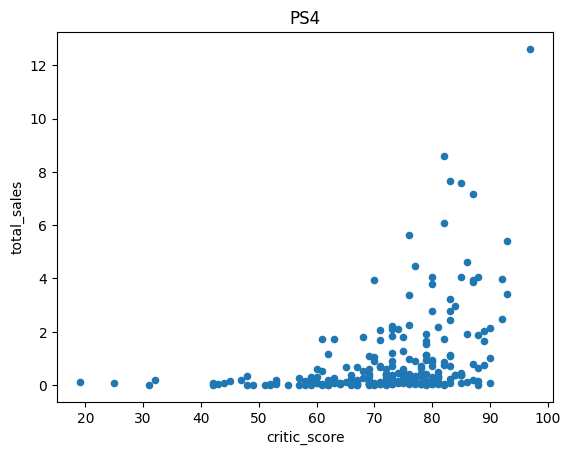

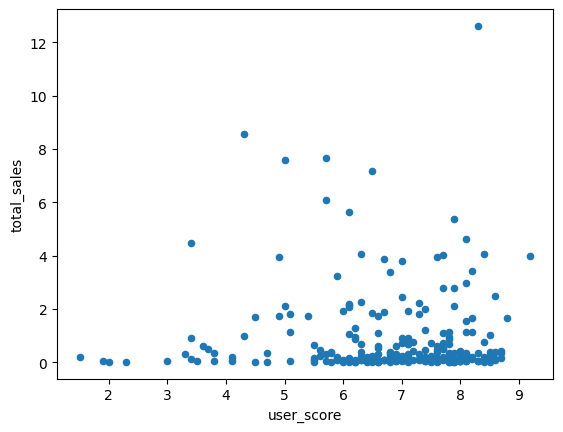

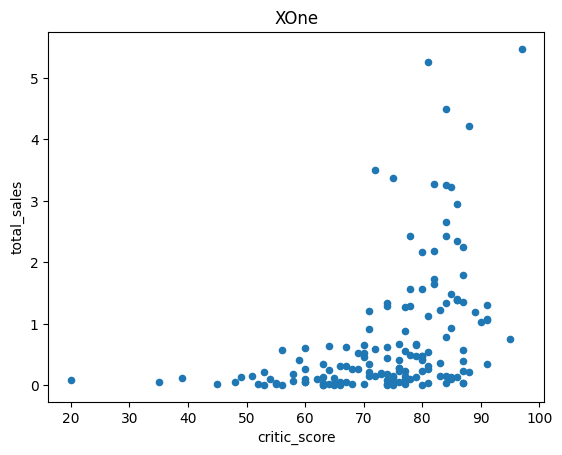

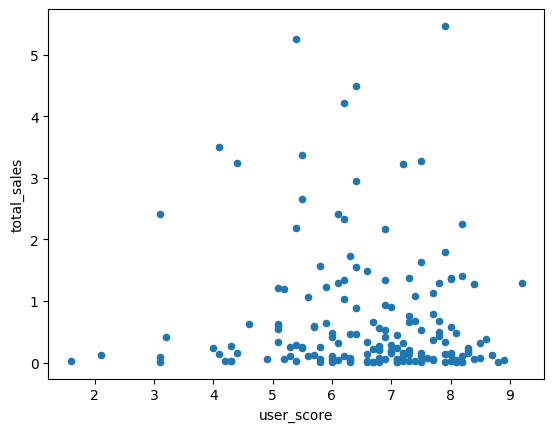

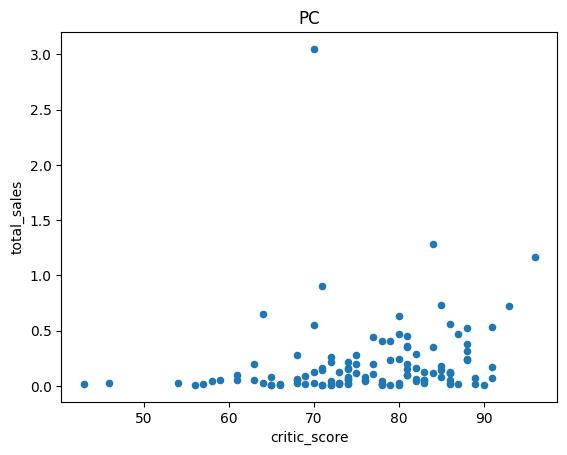

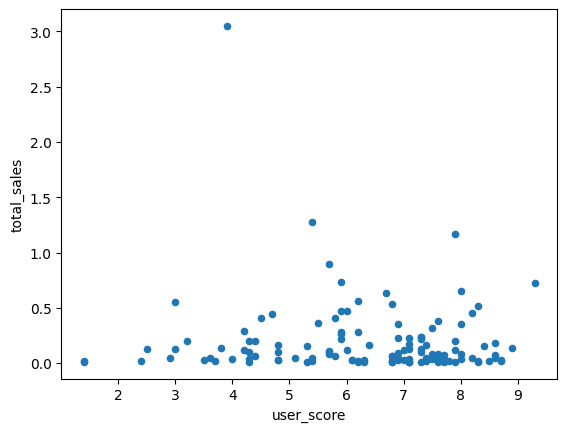

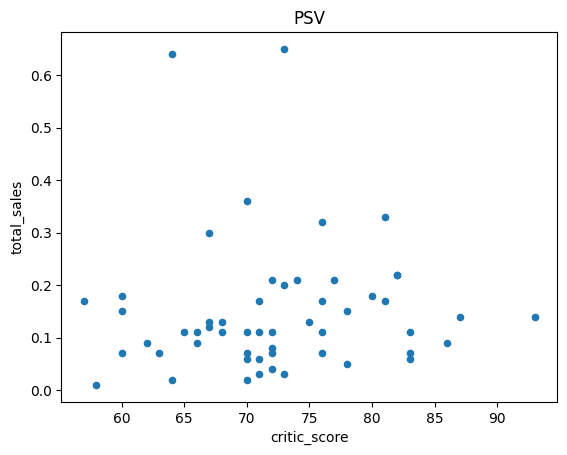

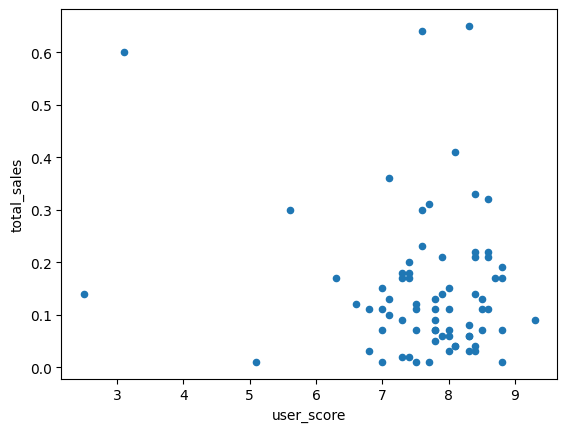

In [235]:
for platform in data['platform'].unique():
    data[data['platform']==platform].plot.scatter (x = 'critic_score', y = 'total_sales', title=platform)
    data[data['platform']==platform].plot.scatter (x = 'user_score', y = 'total_sales')
    print(data[data['platform']==platform]['total_sales']. corr(data[data['platform']==platform]['critic_score']))
    print(data[data['platform']==platform]['total_sales']. corr(data[data['platform']==platform]['user_score']))

Корреляция с оценкой пользователей не прослеживается ни у одной из платформ. Наблюдается средняя (0.4 для PS4 и XOne и 0.3 для PC) корреляция с оценкой критиков.




Посмотрим на общее распределение игр по жанрам. 

In [236]:
data.groupby('genre').agg({'total_sales': ['mean', 'count'], 'critic_score': 'median'}).sort_values(by=('total_sales', 'mean'), ascending=False)

total_sales       critic_score
                    mean count       median
genre                                      
Shooter         1.461250    96         78.0
Sports          0.781649    97         78.0
Action          0.363244   373         73.0
Role-Playing    0.355704   142         76.0
Platform        0.349444    18         78.0
Fighting        0.344839    31         74.0
Racing          0.342115    52         71.5
Misc            0.321250    56         75.5
Simulation      0.273333    30         72.0
Strategy        0.111429    28         80.0
Adventure       0.094355   124         74.5
Puzzle          0.026667     3         88.0

Видно, что выделяется топ-2 успешных по средним продажам жанров: Shooter, Sports. Абсолютный аутсайдер - Puzzles. При этом оценка критиков практически одинакова. Более того, в Puzzles она наибольшая из всех. Интересно, что произведено очень много игр в жанре Adventure, хотя продажи очень низкие. Также крайне много игр жанра Role-Playing и Action, хотя продажи практически средние.

### Промежуточный вывод:
Данные исследованы. Выделено 4 наиболее перспективные платформы: PS4, XOne, PC, PSV. Выявлена положительная корреляция между оценкой критиков и продажами. Обнаружены наиболее продаваемые жанры - Shooter и Action. Обозначен временной интервал исследования - последние 7 лет.

### Шаг 4: Портрет пользователя каждого региона. <a id='step4'></a>


Определим для пользователя каждого региона (NA, EU, JP):  
1. Самые популярные платформы (топ-5). Опишем различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясним разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [237]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(data.groupby('platform').agg({region:'sum'}).sort_values(by=region, ascending=False).head())

          na_sales
platform          
PS4          98.61
XOne         81.27
PC            7.23
PSV           2.52
          eu_sales
platform          
PS4         130.04
XOne         46.25
PC           17.97
PSV           3.53
          jp_sales
platform          
PS4          15.02
PSV          14.54
XOne          0.32
PC            0.00


В Северной Америке и Европе, в отличчие от Японии, доминирует PS4. В Японии, напротив, вперёд уже вырвалась PS5, хотя вдругих странах она пока занимает последние строчки. В Северной Америке XOne идёт почти вровень с PS4, хотя в Европе тот находится на уровне PC. Можно уверенно сказать, что предпочтения не одинаковы, и для каждого региона осмысленно строить свою стратегию таргетинга.

In [238]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(data.groupby('genre').agg({region:'sum'}).sort_values(by=region, ascending=False).head())

              na_sales
genre                 
Shooter          64.56
Action           50.83
Sports           31.42
Role-Playing     17.82
Misc              7.69
              eu_sales
genre                 
Action           56.23
Shooter          54.95
Sports           32.72
Role-Playing     18.65
Racing           10.77
              jp_sales
genre                 
Action           10.77
Role-Playing      8.25
Shooter           2.68
Misc              2.28
Adventure         2.26


В Европе и Северной Америке топ сущностно совпадает - Shooter, Action, Sports, Role-Playing. В Японии два основных топовых жанра - Action и Role-Playing. 

In [239]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    print(data.groupby('rating').agg({region:'sum'}).sort_values(by=region, ascending=False))

           na_sales
rating             
M             81.31
undefined     38.57
T             29.34
E             25.66
E10+          14.75
           eu_sales
rating             
M             81.91
undefined     39.89
E             36.47
T             28.16
E10+          11.36
           jp_sales
rating             
undefined     15.66
T              7.05
M              5.85
E              0.80
E10+           0.52


Интересно, что в Японии большинство проданных игр вообще не имеют никакого рейтинга. Далее идёт рейтинг Т - подростковые игры и М - игры для людей 17+. В Европе и Северной Америке лидирует с существенным отрывом рейтинг М. Далее идёт Т и Е(«Для всех»). Далее идёт E10+(«Для всех от 10 лет и старше»). RP(«Рейтинг ожидается») почти отсутствует везде. 

### Промежуточный вывод:
Выявлена существенная разница игрового потребления в разных регионах. В Северной Америке и Европе, однако, разница в основном касается выбора платформы, и в целом они достаточно близки. В Японии же определённо необходим отдельный подход, с концентрацией на PSV и играх для подростках. Также, видится необходимым узнать причины значения undefined, ведь в Японии он преобладает над остальными настолько, что распределение жанров может быть в реальности абсолютно другим.

### Шаг 5: Проверка гипотез <a id='step5'></a>

#### Гипотеза 1:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [240]:
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(data[data['platform']=='XOne']['user_score'].dropna(), data[data['platform']=='PC']['user_score'].dropna(), equal_var=False)
# применяем именно это т.к. множество игр на платформах отличается, то есть выборка не парная, 
# и ни одно из точных значений нам в точности не известно, то есть с числом не сравнить.
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


p-значение очень велико. Вероятно, средние рейтинги близки.

#### Гипотеза 2:
Средние пользовательские рейтинги жанров Action и Sports разные.

H0: Средние пользовательские рейтинги жанров Action и Sports равны.  
H1: Средний пользовательский рейтинг жанра Action **выше**, чем у Sports.  

Нулевая гипотеза переформулирована т.к. должна быть сформулирована через равенство.

In [241]:
alpha = .05 # критический уровень статистической значимости
results = st.ttest_ind(data[data['genre']=='Action']['user_score'].dropna(), data[data['genre']=='Sports']['user_score'].dropna(), equal_var=False)
# применяем именно это т.к. множество игр разных жанров различно, то есть выборка не парная, 
# и ни одно из точных значений нам в точности не известно, то есть с числом не сравнить.
print('p-значение:', results.pvalue)

if (results.pvalue / 2 < alpha) and (data[data['genre']=='Sports']['user_score'].dropna().mean() < data[data['genre']=='Action']['user_score'].dropna().mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.1265758152694082e-08
Отвергаем нулевую гипотезу


Видно, что у жанра Action по имеющейся выборке рейтинги в среднем сильно выше.

### Промежуточный вывод: <a id='hyp'></a>
Первая гипотеза не может быть отвергнута - нельзя утверждать, что средние не равны.  
Вторая гипотеза также не может быть отвергнута. Конкретно, средние рейтинги жанра Action в имеющихся выборках заметно выше, чем у Sports.

### Шаг 6: Общий вывод <a id='step6'></a>

<a id='end'></a>
В ходе работы были выявлены 4 основные платформы, актуальные на 2017 год: PS4, XOne, PC, PSV.  
Средний срок жизни платформы - порядка 10 лет, но игры на PC представляют собой исключение.  
Была подтверждена положительная корреляция между продажами и оценками критиков.  
Отсутствие половины значений рейтинга ESRB делает некорректным его учёт в построении таргетинговой стратегии в случае с Японией - около двух третей игр не имеют этого рейтинга. С Северной Америкой и Европой дела обстоят лучше - можно утверждать, что наиболее продаваем рейтинг М, далее следуют Т и Е.  
Наиболее популярные жанры:  
NA, EU - Shooter, Action, Sports, Role-Playing.  
JP - Action и Role-Playing.  
PSV наиболее популярна в Японии. В других регионах - PS4.  
Гипотеза 'Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.' и гипотеза 'Средний пользовательский рейтинг жанра Action выше, чем у Sports.' не были отвергнуты.

**Рекомендации аналитика:**  
Следует разделить рекламную кампанию по двум регионам:
1. Европа и Америка:  
   A. платформа - PS4  
   B. жанр - Shooter, Action, Sports, Role-Playing.   
   С. ESRB - M, T, E
1. Япония:  
   A. платформа - PSV  
   B. жанр - Action и Role-Playing.  
   
Больший упор делать на Европу и Америку - в силу неполноты данных, прогноз по Японии может не оправдаться.  
Упор делать на игры с высокой оценкой критиков.